## **I. Files Handling**

## Reading

In [ ]:
def read_songs(file_name):
    file = open(file_name, 'r', encoding='utf-8-sig')
    data = file.read().split('***\n')  # Split by the separator "***"
    file.close()

    songs = {}

    for song_data in data:
        lines = song_data.split('\n') # Split by the separator "enter"

        if len(lines) >= 2:  # Ensure there are enough lines for title and artist
            title = lines[0].strip() # Line 1: Title
            artist = lines[1].strip() # Line 2: Artist
            lyrics = ' '.join(lines[2:]).strip() # Lines 3-? : Lyrics

            # Add the song information to the dictionary
            songs[title] = {
                "artist": artist,
                "lyrics": lyrics
            }

    return songs

In [ ]:
top_songs_fr_raw = read_songs('TOP20_fr.txt')
top_songs_es_raw = read_songs('TOP20_es.txt')
top_songs_kr_raw = read_songs('TOP20_kr.txt')

## Infos

In [ ]:
print("FR song titles:", list(top_songs_fr_raw.keys()))
print("Total number of songs:", len(top_songs_fr_raw))

print("ES song titles:", list(top_songs_es_raw.keys()))
print("Total number of songs:", len(top_songs_es_raw))

print("KR song titles:", list(top_songs_kr_raw.keys()))
print("Total number of songs:", len(top_songs_kr_raw))

FR song titles: ['POUR ELLE', 'SOIS PAS TIMIDE', 'MANON B', 'Monaco', 'SPIDER', 'Ca parle mal', 'J’crois qu’ils ont pas compris', 'Bah Ouais', 'No lo sé', 'Gata Only', 'Hakayet', 'Coco', 'CRF', 'Imagine', 'Ma Meilleure Ennemie', 'Alpha', 'CARTIER SANTOS', 'PROBATION', 'Sous la lune', 'APT.', 'All I Want for Christmas Is You', 'Last Christmas', 'Die With A Smile']
Total number of songs: 23
ES song titles: ['Gran Vía', 'Shibatto', 'Kassandra', 'Qué pasaría', 'Si antes te hubiera conocido', 'Mr Moondial', 'Degenere', 'Iguales', 'Khé?', 'Yo sé', 'Star', 'Halo', 'Duro de verdad pt. 2', 'Luna Llena', 'Los Días Contados', '2AM', 'Se Fue', 'Imagínate', 'Cosas pendientes', 'Soltera', 'Ohnana']
Total number of songs: 21
KR song titles: ['Who', 'HOME SWEET HOME', 'Seven', 'Running Wild', 'APT.', 'Be Mine', 'Whiplash', 'Winter Ahead', 'I’ll Be There', 'POWER', 'Smeraldo Garden Marching Band', '3D', 'Number one girl', 'Standing next to you', 'Slow Dance', 'Luther', 'Skrrr', 'Cherish (My love)', 'to

In [ ]:
print("TOP French Songs:", top_songs_fr_raw)
print("TOP Spanish Songs:", top_songs_es_raw)
print("TOP Korean Songs:", top_songs_kr_raw)

## **II. Data Preprocessing**

## Data Cleaning

In [ ]:
import re

In [ ]:
def clean_lyrics(songs_dict):
    cleaned_songs = {}

    for title, song_data in songs_dict.items():
        # Remove capitale letters
        lyrics = song_data['lyrics'].lower()

        # Remove text between brackets (e.g., [Chorus], [Verse 1])
        lyrics = re.sub(r'\[.*?\]', '', lyrics)

        # Keep only letters, spaces, and common punctuation (. , ! ?)
        cleaned_lyrics = re.sub(r'[^a-zA-Z\s.,!?]', '', lyrics)

        # Normalize spaces (remove extra spaces)
        cleaned_lyrics = re.sub(r'\s+', ' ', cleaned_lyrics).strip()

        cleaned_songs[title] = {
            'artist': song_data['artist'],
            'lyrics': cleaned_lyrics
        }

    return cleaned_songs

In [ ]:
top_songs_fr_cleaned = clean_lyrics(top_songs_fr_raw)
top_songs_es_cleaned = clean_lyrics(top_songs_es_raw)
top_songs_kr_cleaned = clean_lyrics(top_songs_kr_raw)

print("TOP French Songs:", top_songs_fr_cleaned)
print("TOP Spanish Songs:", top_songs_es_cleaned)
print("TOP Korean Songs:", top_songs_kr_cleaned)

## Tokenisation

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

In [ ]:
def tokenize_lyrics(songs_dict):
    tokenized_lyrics = {}

    for title, song_data in songs_dict.items():
        lyrics = song_data['lyrics']
        words = word_tokenize(lyrics) # Tokenize the lyrics
        tokenized_lyrics[title] = words

    return tokenized_lyrics

In [ ]:
top_songs_fr_tokenize = tokenize_lyrics(top_songs_fr_cleaned)
top_songs_es_tokenize = tokenize_lyrics(top_songs_es_cleaned)
top_songs_kr_tokenize  = tokenize_lyrics(top_songs_kr_cleaned)

print("Tokenized lyrics for French songs:", top_songs_fr_tokenize)
print("Tokenized lyrics for Spanish songs:", top_songs_es_tokenize)
print("Tokenized lyrics for Korean songs:", top_songs_kr_tokenize)

## POS tagging

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

In [ ]:
def get_pos_tags(tokenized_lyrics):
    pos_lyrics = {}

    for title, lyrics in tokenized_lyrics.items():
        lyrics_pos = pos_tag(lyrics)  # Get POS tags

        # Target only nouns (NN), adjectives (JJ), and verbs (VB)
        target_lyrics_pos = []
        for word, pos in lyrics_pos:
            if pos in ['NN', 'NNS', 'JJ', 'VB']:
                target_lyrics_pos.append((word, pos))

        pos_lyrics[title] = target_lyrics_pos

    return pos_lyrics

In [ ]:
top_songs_fr_pos = get_pos_tags(top_songs_fr_tokenize)
top_songs_es_pos = get_pos_tags(top_songs_es_tokenize)
top_songs_kr_pos = get_pos_tags(top_songs_kr_tokenize)

print("POS tags for French songs:", top_songs_fr_pos)
print("POS tags for Spanish songs:", top_songs_es_pos)
print("POS tags for Korean songs:", top_songs_kr_pos)

## Lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet') # lemmatizer

In [ ]:
def lemmatize_lyrics(pos_lyrics):
    lemmatized_lyrics = {}

    for title, pos_lyrics in pos_lyrics.items():
        lemmatized_words = []

        for word, pos in pos_lyrics:
            lemma = wnl.lemmatize(word)
            lemmatized_words.append(lemma)

        lemmatized_lyrics[title] = lemmatized_words

    return lemmatized_lyrics

In [ ]:
top_songs_fr_lemma = lemmatize_lyrics(top_songs_fr_pos)
top_songs_es_lemma = lemmatize_lyrics(top_songs_es_pos)
top_songs_kr_lemma = lemmatize_lyrics(top_songs_kr_pos)

print("Lemmas for French Songs:", top_songs_fr_lemma)
print("Lemmas for Spanish Songs:", top_songs_es_lemma)
print("Lemmas for Korean Songs:", top_songs_kr_lemma)

## Stop Word Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
def remove_stop_words(lemma_lyrics):
    no_stop_words_lyrics = {}

    # Extra stopwords
    f = open('stop_words_english.txt', 'r')
    extra_stop_words = f.read().split('\n')
    f.close()
    extra_stop_words += ['dont', 'ive', 'ill', 'uh', 'uhhuh', 'ooh', 'eh', 'yeah', 'youll', 'hey', 'ahah', 'ohoh', 'mm', 'youve', 'ta']

    stop_words = stopwords.words('english') + extra_stop_words

    for title, words in lemma_lyrics.items():
        no_stop_words = []

        for word in words :
          if word not in stop_words: # remove stop words
            no_stop_words.append(word)

        no_stop_words_lyrics[title] = no_stop_words

    return no_stop_words_lyrics

In [ ]:
top_songs_fr_no_stop_words = remove_stop_words(top_songs_fr_lemma)
top_songs_es_no_stop_words = remove_stop_words(top_songs_es_lemma)
top_songs_kr_no_stop_words = remove_stop_words(top_songs_kr_lemma)

print("Non Stop Words for French songs:", top_songs_fr_no_stop_words)
print("Non Stop Words for Spanish songs:", top_songs_es_no_stop_words)
print("Non Stop Words for Korean songs:", top_songs_kr_no_stop_words)

## Limit duplicates (to 3 per music)

In [ ]:
def limit_duplicates(no_stop_words_lyrics):
    limit_duplicates_lyrics = {}

    for title, words in no_stop_words_lyrics.items():
        seen = {}
        unique = []

        for word in words:
            if word not in seen:
                seen[word] = 1
                unique.append(word)
            elif seen[word] < 3:  # Keep duplicates up to three times
                seen[word] += 1
                unique.append(word)

        limit_duplicates_lyrics[title] = unique

    return limit_duplicates_lyrics

In [ ]:
top_songs_fr_limited = limit_duplicates(top_songs_fr_no_stop_words)
top_songs_es_limited = limit_duplicates(top_songs_es_no_stop_words)
top_songs_kr_limited = limit_duplicates(top_songs_kr_no_stop_words)

print("Limited Lyrics (French):", top_songs_fr_limited)
print("Limited Lyrics (Spanish):", top_songs_es_limited)
print("Limited Lyrics (Korean):", top_songs_kr_limited)

## **III. Word Frequency by Country**

## Combine Lyrics

In [ ]:
def combine_lyrics(limited_lyrics):
    combined_lyrics = []

    for title, words in limited_lyrics.items():
        for word in words:
            combined_lyrics.append(word)  # Combine the word

    return combined_lyrics

In [ ]:
top_songs_fr_combined = combine_lyrics(top_songs_fr_limited)
top_songs_es_combined = combine_lyrics(top_songs_es_limited)
top_songs_kr_combined = combine_lyrics(top_songs_kr_limited)

print("Combined lyrics (French):", top_songs_fr_combined)
print("Combined lyrics (Spain):", top_songs_es_combined)
print("Combined lyrics (Korea):", top_songs_kr_combined)

## Word counter

In [ ]:
from collections import Counter

In [ ]:
def count_words(combined_lyrics):
    count = Counter(combined_lyrics)

    return count.most_common(20)

In [ ]:
top20_words_fr = count_words(top_songs_fr_combined)
top20_words_es = count_words(top_songs_es_combined)
top20_words_kr = count_words(top_songs_kr_combined)

print("TOP 20 words (French):", top20_words_fr)
print("TOP 20 words (Spain):", top20_words_es)
print("TOP 20 words (Korea):", top20_words_kr)

TOP 20 words (French): [('baby', 25), ('time', 21), ('night', 19), ('life', 17), ('love', 17), ('girl', 15), ('heart', 14), ('money', 13), ('hold', 11), ('bitch', 11), ('tomorrow', 11), ('man', 10), ('crazy', 10), ('day', 10), ('head', 9), ('paris', 9), ('lot', 9), ('enemy', 9), ('fuck', 9), ('hot', 8)]
TOP 20 words (Spain): [('baby', 25), ('time', 24), ('night', 21), ('good', 19), ('bad', 17), ('mommy', 16), ('friend', 15), ('love', 15), ('girl', 14), ('feel', 12), ('kiss', 11), ('day', 10), ('bed', 9), ('gon', 9), ('single', 8), ('forget', 8), ('mami', 8), ('crazy', 8), ('face', 8), ('eye', 8)]
TOP 20 words (Korea): [('day', 25), ('time', 23), ('heart', 22), ('love', 21), ('night', 20), ('baby', 19), ('place', 14), ('eye', 12), ('light', 11), ('girl', 11), ('song', 10), ('hand', 10), ('feel', 10), ('wan', 9), ('life', 9), ('big', 9), ('real', 9), ('stay', 9), ('slow', 8), ('lovin', 8)]


## Word clouds

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def create_word_cloud(top_words, title):
    word_freq_dict = dict(top_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.title(f'Top 20 Words - {title}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

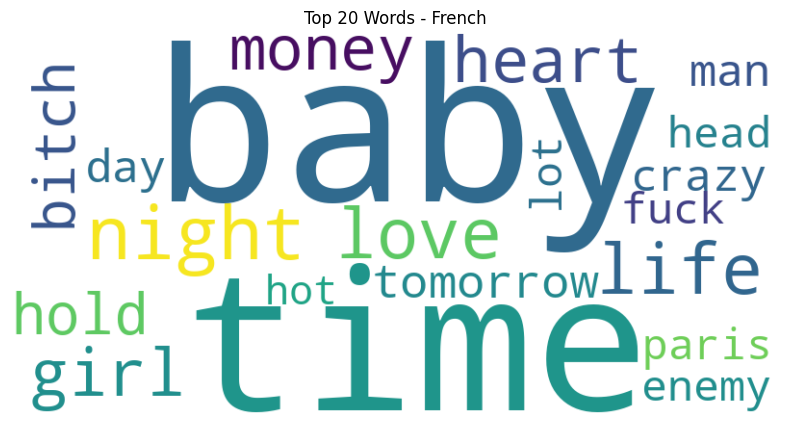

In [ ]:
create_word_cloud(top20_words_fr, 'French')

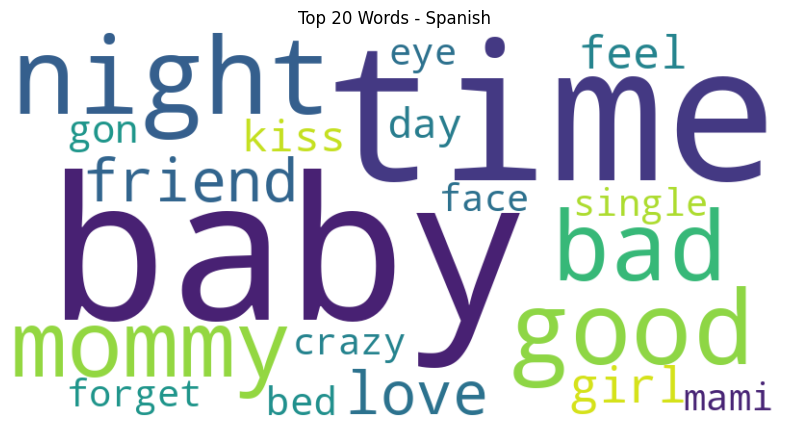

In [ ]:
create_word_cloud(top20_words_es, 'Spanish')

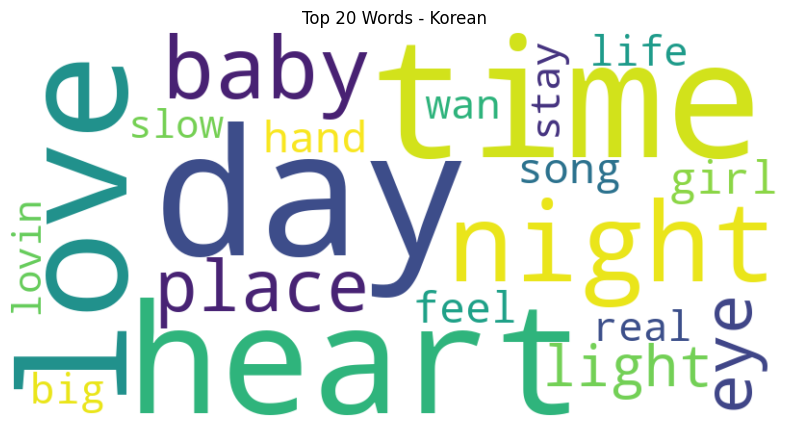

In [ ]:
create_word_cloud(top20_words_kr, 'Korean')

## **IV. Common words across countries**

In [ ]:
#Create sets out of the lyric lists
setfr= set(top_songs_fr_combined)
setes= set(top_songs_es_combined)
setkr= set(top_songs_kr_combined)

# Intersections between the sets
common_vocab1 = setfr.intersection(setes)
common_vocab2= setfr.intersection(setkr)
common_vocab=common_vocab1.intersection(common_vocab2)
print(common_vocab)

{'day', 'love', 'happy', 'wrong', 'summer', 'sky', 'baby', 'piece', 'light', 'moon', 'wan', 'talk', 'trust', 'people', 'taste', 'brand', 'didnt', 'man', 'lip', 'forget', 'star', 'change', 'tear', 'ha', 'truth', 'special', 'face', 'morning', 'jealous', 'heart', 'babe', 'break', 'pull', 'happen', 'play', 'bad', 'feeling', 'em', 'hard', 'flow', 'friend', 'time', 'diamond', 'story', 'hour', 'turn', 'woo', 'real', 'free', 'burn', 'mind', 'god', 'soul', 'night', 'girl', 'street', 'pick', 'eye', 'dream', 'game', 'tonight', 'kiss', 'crazy', 'tomorrow', 'talkin', 'deep', 'hot', 'party', 'shine', 'care', 'worry', 'cool', 'number', 'house', 'shy', 'big', 'sun', 'good', 'week', 'ocean', 'dark', 'lie', 'ayy', 'feel', 'life', 'equal', 'enemy', 'remember', 'head', 'work', 'ready', 'club', 'body', 'smile', 'phone', 'sleep', 'gon', 'touch', 'stay', 'beautiful', 'weird', 'boy', 'money', 'dna', 'nice', 'kid', 'clothes', 'place', 'wont', 'lot', 'fuck', 'dance', 'hand', 'havent'}


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

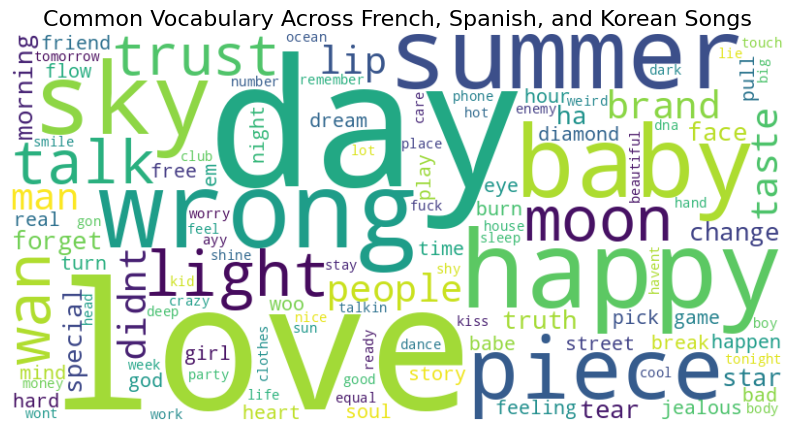

In [ ]:
# Join the common vocabulary into a string (words separated by spaces)
common_vocab_str = ' '.join(common_vocab)

# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(common_vocab_str)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Vocabulary Across French, Spanish, and Korean Songs", fontsize=16)
plt.show()

## **V. Sentiment Analysis**

## Split lyrics by section

In [ ]:
import re

In [ ]:
def split_lyrics_by_sections(top_songs):
    structured_songs = {}

    for title, details in top_songs.items():
        artist = details.get("artist", "")
        lyrics = details.get("lyrics", "")

        # Split the lyrics into sections based on tags
        sections = re.split(r"\[(.*?)\]", lyrics)
        section_dict = {}

        for i in range(1, len(sections), 2):  # Iterate over tags and their content
            section_name = sections[i].strip()  # Tag such as "Intro", "Chorus"
            section_content = sections[i + 1].strip()
            section_dict[section_name] = section_content

        structured_songs[title] = {
            "artist": artist,
            "sections": section_dict
        }

    return structured_songs


In [ ]:
def display_structured_songs(song_dict):

    for title, details in song_dict.items():
        print(f"Title: {title}")
        print(f"Artist: {details['artist']}")

        for section, content in details["sections"].items():
            print(f"[{section}]\n{content}\n")

        print("=" * 50)

In [ ]:
top_songs_kr_split = split_lyrics_by_sections(top_songs_kr_raw)
top_songs_fr_split = split_lyrics_by_sections(top_songs_fr_raw)
top_songs_es_split = split_lyrics_by_sections(top_songs_es_raw)

display_structured_songs(top_songs_kr_split)
display_structured_songs(top_songs_fr_split)
display_structured_songs(top_songs_es_split)

## Model Predictions (Pre-train model used : DistilBERT)

In [ ]:
from transformers import pipeline

In [ ]:
def analyze_song_sentiments(song_dict):
    # Load a pre-trained
    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    results = {}

    for title, details in song_dict.items():
        artist = details.get("artist", "Unknown")
        sections = details.get("sections", {})

        song_sentiments = []
        for section, content in sections.items():
            # Analyze the sentiment of each section
            sentiment_results = sentiment_pipeline(content[:512])  # Truncate to 512 tokens if necessary
            for result in sentiment_results:
                score = result["score"] if result["label"] == "POSITIVE" else -result["score"]
                song_sentiments.append(score)

        # Calculate the average sentiment for the song
        average_sentiment = sum(song_sentiments) / len(song_sentiments)

        # Assign a label based on the average sentiment
        if average_sentiment > 0.25:
            sentiment_label = "POSITIVE"
        elif average_sentiment < -0.25:
            sentiment_label = "NEGATIVE"
        else:
            sentiment_label = "NEUTRAL"

        results[title] = {
            "artist": artist,
            "average_sentiment": average_sentiment,
            "sentiment_label": sentiment_label
        }

    return results

In [ ]:
def display_sentiments_songs(song_dict):
    for title, details in song_dict.items():
        print(f"Title: {title}, Artist: {details['artist']}, Sentiment: {details['sentiment_label']}, Score: {details['average_sentiment']:.2f}")
    print("=" * 50)

In [ ]:
top_songs_kr_sentiment = analyze_song_sentiments(top_songs_kr_split)
top_songs_fr_sentiment = analyze_song_sentiments(top_songs_fr_split)
top_songs_es_sentiment = analyze_song_sentiments(top_songs_es_split)

display_sentiments_songs(top_songs_kr_sentiment)
display_sentiments_songs(top_songs_fr_sentiment)
display_sentiments_songs(top_songs_es_sentiment)

## Sentiment Analysis Results

In [ ]:
def calculate_overall_sentiment(song_dict):
    total_sentiment = 0
    count = 0

    for details in song_dict.values():
        total_sentiment += details['average_sentiment']
        count += 1

    overall_sentiment = total_sentiment / count

    if overall_sentiment > 0.25:
        sentiment_label = "POSITIVE"
    elif overall_sentiment < -0.25:
        sentiment_label = "NEGATIVE"
    else:
        sentiment_label = "NEUTRAL"

    return sentiment_label, overall_sentiment

In [ ]:
top_songs_kr_overall_sentiment_label, top_songs_kr_overall_sentiment_value = calculate_overall_sentiment(top_songs_kr_sentiment)
top_songs_fr_overall_sentiment_label, top_songs_fr_overall_sentiment_value = calculate_overall_sentiment(top_songs_fr_sentiment)
top_songs_es_overall_sentiment_label, top_songs_es_overall_sentiment_value = calculate_overall_sentiment(top_songs_es_sentiment)

print(f"Overall Sentiment for Korean Songs: {top_songs_kr_overall_sentiment_label}, {top_songs_kr_overall_sentiment_value:.2f}")
print(f"Overall Sentiment for French Songs: {top_songs_fr_overall_sentiment_label}, {top_songs_fr_overall_sentiment_value:.2f}")
print(f"Overall Sentiment for Spanish Songs: {top_songs_es_overall_sentiment_label}, {top_songs_es_overall_sentiment_value:.2f}")

Overall Sentiment for Korean Songs: POSITIVE, 0.55
Overall Sentiment for French Songs: NEUTRAL, -0.03
Overall Sentiment for Spanish Songs: NEUTRAL, -0.19


## **VI. Semantic Similarity Between Songs**

In [ ]:
def display_top_similarities(results, n=10):
    # Get the top n results
    top_results = results[:n]

    # Convert to DataFrame
    df = pd.DataFrame(top_results)

    # Display the Markdown table
    print(df.to_markdown(index=False))

## **1. Sentence similarity using spaCy**

| Similarity Measure | Python Function | Similarity Range | Interpretation | Basic Concept |
|:-:|:-:|:-:|:-:|:-:|
| **Cosine Similarity** | `similarity()` | -1 ~ 1 | 1: Similar <br> 0: Unrelated <br> -1: Opposite | Calculating the **cosine of the angle** between the vectors |

<br>

- English: `en_core_web_md`, `en_core_web_lg`
- Korean: `ko_core_news_md`, `ko_core_news_lg`






In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
import spacy
import pandas as pd

In [ ]:
def calculate_similarity_SPACY(dict1, dict2):
    # Load a model
    model = spacy.load("en_core_web_lg") #lg = large model

    results = []

    for title1, song_data1 in dict1.items():
        song1 = model(song_data1['lyrics'])

        for title2, song_data2 in dict2.items():
            if title1 != title2: # remove duplicates
                song2 = model(song_data2['lyrics'])

                # Calculate cosine similarity
                similarity = song1.similarity(song2)

                if dict2 is top_songs_fr_cleaned:
                  song2_set = "French Songs"
                elif dict2 is top_songs_es_cleaned:
                  song2_set = "Spanish Songs"

                results.append({"Korean Songs": f"{title1}", song2_set: f"{title2}", "Similarity": similarity})

    # Sort by decreasing similarity
    results = sorted(results, key=lambda x: x["Similarity"], reverse=True)

    return results

In [ ]:
kr_fr_results = calculate_similarity_SPACY(top_songs_kr_cleaned, top_songs_fr_cleaned)
print("Top 10 Similar Songs (Korea vs France):")
display_top_similarities(kr_fr_results)

kr_es_results = calculate_similarity_SPACY(top_songs_kr_cleaned, top_songs_es_cleaned)
print("\nTop 10 Similar Songs (Korea vs Spain):")
display_top_similarities(kr_es_results)

Top 10 Similar Songs (Korea vs France):
| Korean Songs                  | French Songs                   |   Similarity |
|:------------------------------|:-------------------------------|-------------:|
| 3D                            | J’crois qu’ils ont pas compris |     0.976368 |
| Smeraldo Garden Marching Band | J’crois qu’ils ont pas compris |     0.976348 |
| Luther                        | Bah Ouais                      |     0.975846 |
| Skrrr                         | Sous la lune                   |     0.974958 |
| Skrrr                         | J’crois qu’ils ont pas compris |     0.97418  |
| HOME SWEET HOME               | Bah Ouais                      |     0.974024 |
| Luther                        | J’crois qu’ils ont pas compris |     0.973278 |
| Luther                        | Ca parle mal                   |     0.973228 |
| Number one girl               | Gata Only                      |     0.972485 |
| Skrrr                         | Bah Ouais               

## **2. Sentence similarity using sBERT**

Pretrained BERT models (https://www.sbert.net/docs/pretrained_models.html)

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

In [ ]:
def calculate_similarity_BERT(dict1, dict2):
    # Load a pre-trained BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2') # "all-mpnet-base-v2" is too long

    results = []
    top10_per_songs = {}

    for title1, song_data1 in dict1.items():
        # Generate sentence embeddings
        song1_embedding = model.encode(song_data1['lyrics'], convert_to_tensor=True)

        similarities_per_songs = []

        for title2, song_data2 in dict2.items():
            if title1 != title2:
                # Generate sentence embeddings
                song2_embedding = model.encode(song_data2['lyrics'], convert_to_tensor=True)
                # Calculate cosine similarity between two vectors
                similarity = util.cos_sim(song1_embedding, song2_embedding)

                # Determine the originating playlist
                if dict2 is top_songs_fr_cleaned:
                    song_set = "French Songs"
                elif dict2 is top_songs_es_cleaned:
                    song_set = "Spanish Songs"

                results.append({
                    "Korean Songs": title1,
                    "Artist Korean": song_data1['artist'],
                    song_set: title2,
                    "Artist Foreign": song_data2['artist'],
                    "Playlist": song_set,
                    "similarity": similarity
                })

                similarities_per_songs.append({
                    "similar_title": title2,
                    "similar_artist": song_data2['artist'],
                    "similarity": similarity,
                    "song_set": song_set
                })

        # Sort and keep the top 10 most similar songs for the current song
        top10_per_songs[title1] = sorted(similarities_per_songs, key=lambda x: x["similarity"], reverse=True)[:10]

    # Sort the results by similarity in descending order
    results = sorted(results, key=lambda x: x["similarity"], reverse=True)
    return results, top10_per_songs

In [ ]:
kr_fr_results, top10_similar_songs_kr_fr = calculate_similarity_BERT(top_songs_kr_cleaned, top_songs_fr_cleaned)
print("Top 10 Similar Songs (Korea vs France):")
display_top_similarities(kr_fr_results)

kr_es_results, top10_similar_songs_kr_es = calculate_similarity_BERT(top_songs_kr_cleaned, top_songs_es_cleaned)
print("\nTop 10 Similar Songs (Korea vs Spain):")
display_top_similarities(kr_es_results)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Top 10 Similar Songs (Korea vs France):
| Korean Songs    | Artist Korean            | French Songs     | Artist Foreign         | Playlist     |   similarity |
|:----------------|:-------------------------|:-----------------|:-----------------------|:-------------|-------------:|
| 3D              | Jungkook ft. Jack Harlow | Gata Only        | FloyyMenor & Cris Mj   | French Songs |     0.608439 |
| Luther          | Kendrick Lamar ft. Sza   | Die With A Smile | Lady Gaga & Bruno Mars | French Songs |     0.603856 |
| Number one girl | Rosé                     | Die With A Smile | Lady Gaga & Bruno Mars | French Songs |     0.601615 |
| number one girl | ROSÉ                     | Die With A Smile | Lady Gaga & Bruno Mars | French Songs |     0.601615 |
| Be Mine         | Jimin                    | Gata Only        | FloyyMenor & Cris Mj   | French Songs |     0.598081 |
| HOME SWEET HOME | G-Dragon                 | CRF              | Yorssy                 | French Songs |     0.5

## **VII. Songs Recommendations**

## Combine top similar song

In [ ]:
from collections import defaultdict

In [ ]:
top_similar_songs_kr = defaultdict(list)

# Add songs from Korea vs France
for key, value in top10_similar_songs_kr_fr.items():
    top_similar_songs_kr[key].extend(value)

# Add songs from Korea vs Spain
for key, value in top10_similar_songs_kr_es.items():
    top_similar_songs_kr[key].extend(value)

print(top_similar_songs_kr)

## Add sentiments into the combined list

In [ ]:
for kr_song, similar_songs in top_similar_songs_kr.items():
    # Retrieve only the sentiment label for the Korean song
    korean_song_sentiment_label = top_songs_kr_sentiment.get(kr_song, {}).get("sentiment_label", "UNKNOWN")

    for entry in similar_songs:
        title = entry["similar_title"]
        song_set = entry["song_set"]

        # Add the sentiment label for the foreign song
        if song_set == "French Songs" and title in top_songs_fr_sentiment:
            entry["similar_song_sentiment"] = top_songs_fr_sentiment[title]["sentiment_label"]
        elif song_set == "Spanish Songs" and title in top_songs_es_sentiment:
            entry["similar_song_sentiment"] = top_songs_es_sentiment[title]["sentiment_label"]

        # Add the sentiment label for the Korean song
        entry["korean_song_sentiment"] = korean_song_sentiment_label

In [ ]:
for kr_song, similar_songs in top_similar_songs_kr.items():
    print(kr_song)
    for entry in similar_songs:
        print(entry)

## Filter similar sentiments

In [ ]:
def filter_similar_sentiments(top_similar_songs_kr):
    filtered_top_similar_songs = {}

    for kr_song, similar_songs in top_similar_songs_kr.items():
        # Filter similar songs with matching sentiments
        filtered_songs = [
            entry for entry in similar_songs
            if entry["korean_song_sentiment"] == entry["similar_song_sentiment"]
        ]

        # Add to the dictionary if filtered songs exist
        if filtered_songs:
            filtered_top_similar_songs[kr_song] = filtered_songs

    return filtered_top_similar_songs

In [ ]:
filtered_top_similar_songs_kr = filter_similar_sentiments(top_similar_songs_kr)

for kr_song, similar_songs in filtered_top_similar_songs_kr.items():
    print(kr_song)
    for entry in similar_songs:
        print(entry)

## Keep top 3 similar songs

In [ ]:
def limit_similar_songs_by_sentiment(top_similar_songs_kr):
    limited_top_similar_songs = {}

    for kr_song, similar_songs in top_similar_songs_kr.items():
        # Sort the similar songs by similarity (highest to lowest)
        similar_songs_sorted = sorted(similar_songs, key=lambda x: x["similarity"], reverse=True)

        # Take the top 3 similar sentiments
        limited_songs = similar_songs_sorted[:3]

        # Add to the dictionary if limited songs exist
        if limited_songs:
            limited_top_similar_songs[kr_song] = limited_songs

    return limited_top_similar_songs

In [ ]:
limited_top_similar_songs_kr = limit_similar_songs_by_sentiment(filtered_top_similar_songs_kr)

for kr_song, similar_songs in limited_top_similar_songs_kr.items():
    print(kr_song)
    for entry in similar_songs:
        print(entry)

## Recommendations Song Service

In [ ]:
def display_songs(songs_dict, playlist_name):
    print(f"\n Here is the list of top songs in Korea:")

    for index, (title, song_data) in enumerate(songs_dict.items(), 1):
        print(f"{index}- {title}, {song_data['artist']}")

    while True:
        try:
            song_choice = input("\nEnter the number of the song you want recommendations for: ")
            song_choice_index = int(song_choice) - 1
            if 0 <= song_choice_index < len(songs_dict):
                return song_choice_index
            else:
                print("--> Invalid number. Please enter a valid song number.")
        except ValueError:
            print("--> Invalid input. Please enter a number.")

In [ ]:
def display_recommendations(limited_top_similar_songs_kr, top_songs_kr_raw):
    song_index = display_songs(top_songs_kr_raw, "Korean Songs")
    selected_song = list(top_songs_kr_raw.keys())[song_index]
    recommendations = limited_top_similar_songs_kr.get(selected_song, [])

    print(f"\nTop 3 recommendations for {selected_song} by {top_songs_kr_raw[selected_song]['artist']}:")
    for i, recommendation in enumerate(recommendations, 1):
        title = recommendation['similar_title']
        artist = recommendation.get('similar_artist', 'Unknown Artist')
        playlist = recommendation.get('song_set', 'Unknown Playlist')
        print(f"{i}- {title} by {artist} from {playlist}")
    print("\n")

In [ ]:
print("-------------RECOMMENDATIONS SONG SERVICE-------------")
print("\n안녕하세요! Hello! ¡Hola! Bonjour!")
print("\nWelcome to our Recommendations Songs Services!")

limited_top_similar_songs_kr = limit_similar_songs_by_sentiment(filtered_top_similar_songs_kr)

while True:
    display_recommendations(limited_top_similar_songs_kr, top_songs_kr_raw)

    print("Enter 'quit' if you want to stop the process")
    choice = input("Enter 'quit' to exit or press Enter to continue: ")

    if choice.lower() == 'quit':
        print("\nThank you for using our service!\n")
        print("Good Bye!")
        print("안녕히 가세요!")
        print("¡Adiós!")
        print("Au revoir!")
        break

-------------RECOMMENDATIONS SONG SERVICE-------------

안녕하세요! Hello! ¡Hola! Bonjour!

Welcome to our Recommendations Songs Services!

 Here is the list of top songs in Korea:
1- Who, Jimin
2- HOME SWEET HOME, G-Dragon
3- Seven, Jung Kook
4- Running Wild, Jin
5- APT., ROSÉ & Bruno Mars
6- Be Mine, Jimin
7- Whiplash, aespa
8- Winter Ahead, V & Park Hyo Shin
9- I’ll Be There, Jin
10- POWER, G-Dragon
11- Smeraldo Garden Marching Band, Jimin ft.Loco
12- 3D, Jungkook ft. Jack Harlow
13- Number one girl, Rosé
14- Standing next to you, Jungkook
15- Slow Dance, Jimin ft. Sofia Carson
16- Luther, Kendrick Lamar ft. Sza
17- Skrrr, Haon ft. Giselle
18- Cherish (My love), ILLIT
19- toxic till the end, ROSÉ
20- White Christmas, Bing Crosby
21- number one girl, ROSÉ

Enter the number of the song you want recommendations for: 20

Top 3 recommendations for White Christmas by Bing Crosby:
1- Last Christmas by Wham! from French Songs
2- Die With A Smile by Lady Gaga & Bruno Mars from French Songs
3- Ohn